In [2]:
###Parte 1: Familiarizandonos con la base EPH y limpieza

In [3]:
pip install pandas

In [4]:
import pandas as pd

In [5]:
import os

In [6]:
#Importamos los archivos del primer trimestre de la EPH de los años 2004 y 2024

In [7]:
from google.colab import files

uploaded = files.upload()

Saving usu_individual_T104.dta to usu_individual_T104.dta


In [8]:
df_stata = pd.read_stata("usu_individual_T104.dta")

In [161]:
#Imprimimos las columnas para poder elegir la región
print(df_stata.columns)

Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR',
       'PJ1_1', 'PJ2_1', 'PJ3_1', 'IDIMPP'],
      dtype='object', length=176)


In [162]:
df_stata.rename(columns=str.upper, inplace=True)
#Renombramos la columna así coincide con la EPH del 2024

In [163]:
print(df_stata.columns)

Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR',
       'PJ1_1', 'PJ2_1', 'PJ3_1', 'IDIMPP'],
      dtype='object', length=176)


In [167]:
from google.colab import files

uploaded = files.upload()

Saving usu_individual_T124.xlsx to usu_individual_T124 (1).xlsx


In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
df_excel = pd.read_excel("usu_individual_T124.xlsx")

KeyboardInterrupt: 

In [170]:
print(df_excel.columns)

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)


In [172]:
# Aseguramos que las regiones sean comparables
df_excel_noa = df_excel[df_excel["REGION"] == 40]
df_stata_noa = df_stata[df_stata["REGION"] == "NOA"]

# Verificar que ambas selecciones estén bien hechas
print("Regiones seleccionadas en df_excel:", df_excel_noa["REGION"].unique())
print("Regiones seleccionadas en df_stata:", df_stata_noa["REGION"].unique())

Regiones seleccionadas en df_excel: [40]
Regiones seleccionadas en df_stata: ['NOA']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']


In [173]:
print(df_stata_noa.columns.tolist())

['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', '

In [190]:
# Filtramos las columnas de interés en los DataFrames de 2004 y 2024
variables_interes = [
    "CH04", "CH06", "CH07", "CH08", "CH10", "CH11", "CH12", "CH13",
    "NIVEL_ED", "ESTADO", "CAT_OCUP", "CAT_INAC", "PP02H", "PP02I", "IPCF"
]

# Filtrar solo las columnas que existen en cada DataFrame
variables_interes_stata = [col for col in variables_interes if col in df_stata_noa.columns]
variables_interes_excel = [col for col in variables_interes if col in df_excel_noa.columns]

# Aplicar el filtrado
df_stata_noa = df_stata_noa[variables_interes_stata]
df_excel_noa = df_excel_noa[variables_interes_excel]

# Comprobar qué columnas se seleccionaron
print(f"Columnas seleccionadas de df_stata_noa: {df_stata_noa.columns.tolist()}")
print(f"Columnas seleccionadas de df_excel_noa: {df_excel_noa.columns.tolist()}")


Columnas seleccionadas de df_stata_noa: ['CH04', 'CH06', 'CH07', 'CH08', 'CH10', 'CH11', 'CH12', 'CH13', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02H', 'PP02I', 'IPCF']
Columnas seleccionadas de df_excel_noa: ['CH04', 'CH06', 'CH07', 'CH08', 'CH10', 'CH11', 'CH12', 'CH13', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02H', 'PP02I', 'IPCF']


In [191]:
from sklearn.preprocessing import LabelEncoder

# Creamos una copia para evitar advertencias de SettingWithCopy
df_stata_noa = df_stata_noa.copy()

# Convertimos todas las columnas categóricas (tipo object o category) en números
label_encoder = LabelEncoder()
for col in df_stata_noa.columns:
    if df_stata_noa[col].dtype == 'object' or str(df_stata_noa[col].dtype).startswith('category'):
        try:
            # Convertir la columna a tipo str antes de aplicar el LabelEncoder
            df_stata_noa[col] = label_encoder.fit_transform(df_stata_noa[col].astype(str))
        except Exception as e:
            # Imprimir el error si ocurre
            print(f"No se pudo transformar la columna '{col}': {e}")

# Verificar si la conversión fue exitosa mostrando las primeras filas
print("Primeras filas después de la conversión:")
print(df_stata_noa.head())

Primeras filas después de la conversión:
      CH04  CH06  CH07  CH08  CH10  CH11  CH12  CH13  NIVEL_ED  ESTADO  \
7647     0    71     1     4     1     0     6     2         0       2   
7648     1    28     3     1     1     0     7     1         3       0   
7649     0    27     3     1     1     0     6     2         0       2   
7650     0     5     2     1     3     3     4     1         3       2   
7651     1     2     2     1     3     3     1     1         1       2   

      CAT_OCUP  CAT_INAC  PP02H  PP02I   IPCF  
7647         0         4      1      1  280.0  
7648         1         0      0      0   90.0  
7649         0         1      2      2   90.0  
7650         0         3      1      1   90.0  
7651         0         3      1      1   90.0  


In [192]:
# Filtramos los datos de desocupados (valor 2) e inactivos (valor 3) según el estado
desocupados = df_stata_noa[df_stata_noa['ESTADO'] == 2]
inactivos = df_stata_noa[df_stata_noa['ESTADO'] == 3]

# Contamos la cantidad de desocupados e inactivos
print(f"Cantidad de desocupados: {len(desocupados)}")
print(f"Cantidad de inactivos: {len(inactivos)}")

# Calcular la media de IPCF por estado
media_ipcf_desocupados = desocupados['IPCF'].mean()
media_ipcf_inactivos = inactivos['IPCF'].mean()

# Imprimir la media de IPCF
print(f"Media IPCF para desocupados: {media_ipcf_desocupados}")
print(f"Media IPCF para inactivos: {media_ipcf_inactivos}")


Cantidad de desocupados: 3597
Cantidad de inactivos: 1854
Media IPCF para desocupados: 210.57095806165427
Media IPCF para inactivos: 146.58193318790322


In [193]:
# Filtramos solo las columnas que existan realmente en cada DataFrame
variables_interes_stata = [col for col in variables_interes if col in df_stata_noa.columns]
variables_interes_excel = [col for col in variables_interes if col in df_excel_noa.columns]

# Verificar las columnas seleccionadas para ambos DataFrames
print("Columnas seleccionadas en df_stata_noa:", variables_interes_stata)
print("Columnas seleccionadas en df_excel_noa:", variables_interes_excel)

df_stata_noa = df_stata_noa[variables_interes_stata]
df_excel_noa = df_excel_noa[variables_interes_excel]

Columnas seleccionadas en df_stata_noa: ['CH04', 'CH06', 'CH07', 'CH08', 'CH10', 'CH11', 'CH12', 'CH13', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02H', 'PP02I', 'IPCF']
Columnas seleccionadas en df_excel_noa: ['CH04', 'CH06', 'CH07', 'CH08', 'CH10', 'CH11', 'CH12', 'CH13', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02H', 'PP02I', 'IPCF']


In [194]:
#Agregamos una columna que nos indique a qué año pertenece cada dato
df_stata_noa["ANO4"] = 2004
df_excel_noa["ANO4"] = 2024

In [197]:
# Verificamos los tipos de datos de las variables seleccionadas
print("Tipos de datos en df_stata_noa para las variables seleccionadas:\n", df_stata_noa[variables_interes_stata].dtypes)
print("\nTipos de datos en df_excel_noa para las variables seleccionadas:\n", df_excel_noa[variables_interes_excel].dtypes)

Tipos de datos en df_stata_noa para las variables seleccionadas:
 CH04          int64
CH06          int64
CH07          int64
CH08          int64
CH10          int64
CH11          int64
CH12          int64
CH13          int64
NIVEL_ED      int64
ESTADO        int64
CAT_OCUP      int64
CAT_INAC      int64
PP02H         int64
PP02I         int64
IPCF        float64
dtype: object

Tipos de datos en df_excel_noa para las variables seleccionadas:
 CH04          int64
CH06          int64
CH07          int64
CH08          int64
CH10          int64
CH11          int64
CH12          int64
CH13          int64
NIVEL_ED      int64
ESTADO        int64
CAT_OCUP      int64
CAT_INAC      int64
PP02H         int64
PP02I         int64
IPCF        float64
dtype: object


In [198]:
# Cantidad de valores faltantes (NA) por cada variable de interés en df_stata_noa (2024)
missing_values_stata = df_stata_noa[variables_interes_stata].isna().sum()

# Cantidad de valores faltantes (NA) por cada variable de interés en df_excel_noa (2004)
missing_values_excel = df_excel_noa[variables_interes_excel].isna().sum()

# Mostramos los resultados
print("Valores faltantes por variable en df_stata_noa (2024):\n", missing_values_stata)
print("\nValores faltantes por variable en df_excel_noa (2004):\n", missing_values_excel)


Valores faltantes por variable en df_stata_noa (2024):
 CH04        0
CH06        0
CH07        0
CH08        0
CH10        0
CH11        0
CH12        0
CH13        0
NIVEL_ED    0
ESTADO      0
CAT_OCUP    0
CAT_INAC    0
PP02H       0
PP02I       0
IPCF        0
dtype: int64

Valores faltantes por variable en df_excel_noa (2004):
 CH04        0
CH06        0
CH07        0
CH08        0
CH10        0
CH11        0
CH12        0
CH13        0
NIVEL_ED    0
ESTADO      0
CAT_OCUP    0
CAT_INAC    0
PP02H       0
PP02I       0
IPCF        0
dtype: int64


In [200]:
# Verificar si hay valores negativos en la columna IPCF
negative_ipcf_stata = df_stata_noa[df_stata_noa['IPCF'] < 0]
negative_ipcf_excel = df_excel_noa[df_excel_noa['IPCF'] < 0]

# Mostrar los registros con valores negativos en IPCF
print("Registros con IPCF negativo en 2024 (df_stata_noa):\n", negative_ipcf_stata)
print("\nRegistros con IPCF negativo en 2004 (df_excel_noa):\n", negative_ipcf_excel)

Registros con IPCF negativo en 2024 (df_stata_noa):
 Empty DataFrame
Columns: [CH04, CH06, CH07, CH08, CH10, CH11, CH12, CH13, NIVEL_ED, ESTADO, CAT_OCUP, CAT_INAC, PP02H, PP02I, IPCF, ANO4]
Index: []

Registros con IPCF negativo en 2004 (df_excel_noa):
 Empty DataFrame
Columns: [CH04, CH06, CH07, CH08, CH10, CH11, CH12, CH13, NIVEL_ED, ESTADO, CAT_OCUP, CAT_INAC, PP02H, PP02I, IPCF, ANO4]
Index: []


In [201]:
#exportamos como un excel para corroborar que los datos y las columnas estén bien distribuidas
df_unido.to_excel("df_unido.xlsx", index=False)

In [196]:
###Las variables elegidas y su significado según el "Diseño de Registro y Estructura para las bases de Microdatos"
#Variable Significado
#CH04	Sexo
#CH06	Edad
#CH07	Estado civil
#CH08	Cobertura médica
#CH10	Asistencia establecimiento educativo
#CH11	Tipo de establecimiento
#CH12	Nivel más alto completado
#CH13	¿Finalizó?
#NIVEL_ED	Nivel educativo
#ESTADO	Condición de actividad (ocupado, desocupado, inactivo)
#CAT_OCUP	Categoría ocupacional
#CAT_INAC	Categoría de inactividad
#PP02H	En los últimos 12 meses ¿buscó trabajo en algún momento?
#PP02I	En los últimos 12 meses ¿trabajó en algún momento?
#P47T	Ingreso total individual

In [85]:
#Parte II: Primer Análisis Exploratorio

In [39]:
#PUNTO 3

In [203]:
import matplotlib.pyplot as plt

In [204]:
import seaborn as sns

In [205]:
import numpy as np

In [135]:
#Instalamos la biblioteca de matplot y seaborn para poder realizar gráficos visualmente agradables siguiendo las recomendaciones de Schwabish.

In [217]:
# Filtrar los datos para el año 2004 y 2024 usando la columna 'ANO4'
df_2004_sexo = df_unido[df_unido["ANO4"] == 2004]
df_2024_sexo = df_unido[df_unido["ANO4"] == 2024]

# Verificar la cantidad de registros para cada año
print("Registros en 2004:", df_2004_sexo.shape)
print("Registros en 2024:", df_2024_sexo.shape)

Registros en 2004: (9393, 9)
Registros en 2024: (10125, 9)


Conteo de sexo en 2004:
 SEXO_LABEL
Mujeres    5306
Hombres    4819
Name: count, dtype: int64
Conteo de sexo en 2024:
 SEXO_LABEL
Mujeres    4926
Hombres    4467
Name: count, dtype: int64


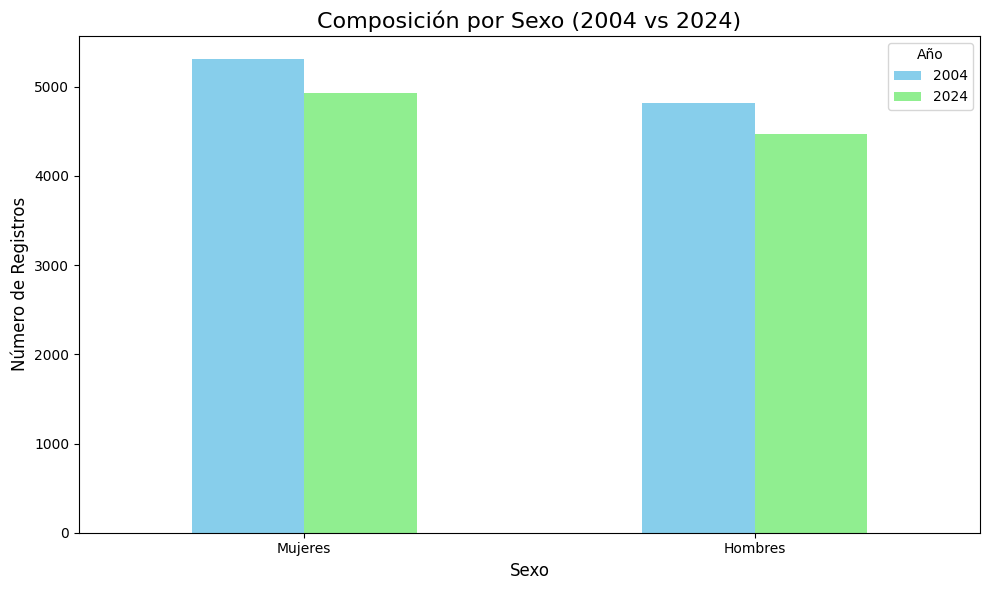

In [227]:
# Crear una columna de etiquetas de sexo consistente para ambos años
# En 2004: según lo observado, CH04: 1 = Hombres, 2 = Mujeres
df_excel_noa['SEXO_LABEL'] = df_excel_noa['CH04'].replace({1: "Hombres", 2: "Mujeres"})

# En 2024: según lo observado, CH04: 0 = Mujeres, 1 = Hombres
df_stata_noa['SEXO_LABEL'] = df_stata_noa['CH04'].replace({0: "Mujeres", 1: "Hombres"})

# Ahora, contar los registros por sexo para cada año
sexo_2004 = df_excel_noa['SEXO_LABEL'].value_counts()
sexo_2024 = df_stata_noa['SEXO_LABEL'].value_counts()

print("Conteo de sexo en 2004:\n", sexo_2004)
print("Conteo de sexo en 2024:\n", sexo_2024)

# Unir los resultados en un DataFrame para facilitar la comparación
sexo_comparacion = pd.DataFrame({
    "2004": sexo_2004,
    "2024": sexo_2024
}).fillna(0)

# Para asegurarnos de que el orden de las categorías sea el deseado (Mujeres y Hombres)
sexo_comparacion = sexo_comparacion.reindex(["Mujeres", "Hombres"])

# Crear el gráfico de barras
sexo_comparacion.plot(kind="bar", figsize=(10,6), color=["skyblue", "lightgreen"])

# Ajustar detalles del gráfico
plt.title("Composición por Sexo (2004 vs 2024)", fontsize=16)
plt.xlabel("Sexo", fontsize=12)
plt.ylabel("Número de Registros", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Año", loc="upper right")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
#PUNTO 4

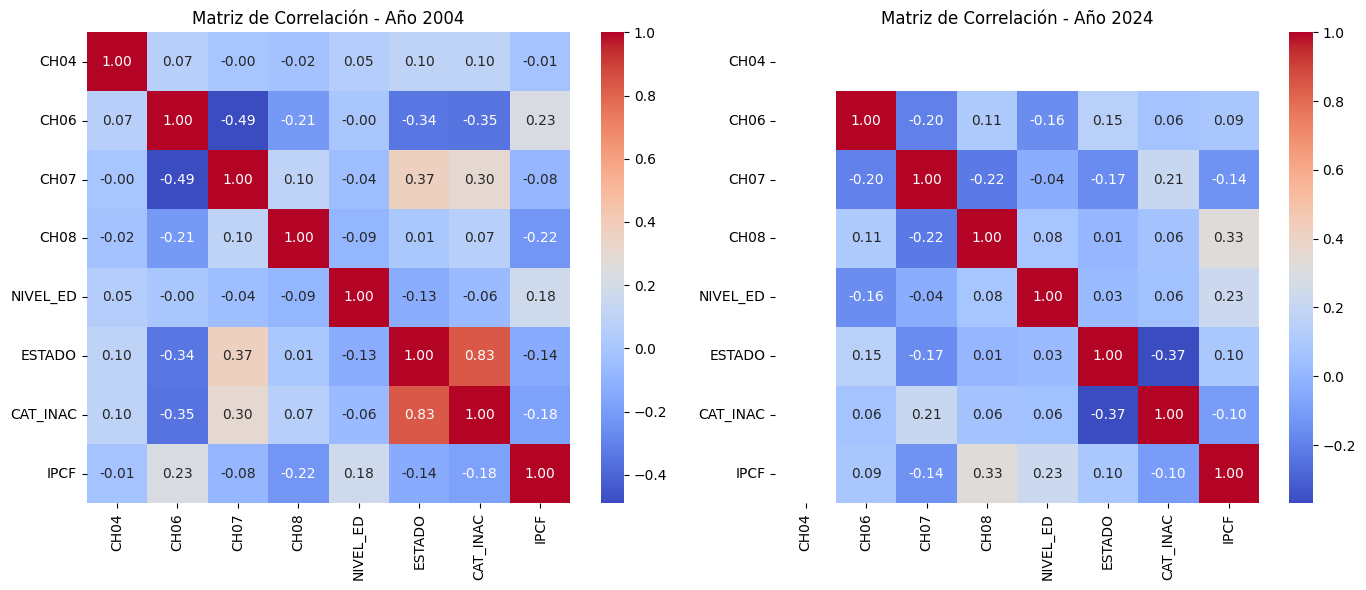

In [228]:
# Variables de interés para la correlación
variables_correlacion = ["CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF"]

# Filtrar y limpiar los datos para asegurarse de tener solo los valores válidos
df_2004_corr = df_excel_noa[variables_correlacion].copy()
df_2024_corr = df_stata_noa[variables_correlacion].copy()

# Eliminar filas con valores nulos o con valores de sexo inválido
df_2004_corr = df_2004_corr[df_2004_corr["CH04"].isin([1, 2])]
df_2024_corr = df_2024_corr[df_2024_corr["CH04"].isin([1, 2])]

df_2004_corr = df_2004_corr.dropna()
df_2024_corr = df_2024_corr.dropna()

# Calcular matrices de correlación
correlacion_2004 = df_2004_corr.corr()
correlacion_2024 = df_2024_corr.corr()

# Graficar matrices de correlación
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(correlacion_2004, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - Año 2004")

plt.subplot(1, 2, 2)
sns.heatmap(correlacion_2024, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - Año 2024")

plt.tight_layout()
plt.show()


In [152]:
#parte 3

In [232]:
# Contar desocupados e inactivos
desocupados_2004 = df_excel_noa[df_excel_noa["ESTADO"] == 2].shape[0]
inactivos_2004 = df_excel_noa[df_excel_noa["ESTADO"] == 3].shape[0]

desocupados_2024 = df_stata_noa[df_stata_noa["ESTADO"] == 2].shape[0]
inactivos_2024 = df_stata_noa[df_stata_noa["ESTADO"] == 3].shape[0]

# Media de IPCF según estado
media_ipcf_2004 = df_excel_noa.groupby("ESTADO")["IPCF"].mean()
media_ipcf_2024 = df_stata_noa.groupby("ESTADO")["IPCF"].mean()

print(f"Desocupados 2004: {desocupados_2004}, Inactivos 2004: {inactivos_2004}")
print(f"Desocupados 2024: {desocupados_2024}, Inactivos 2024: {inactivos_2024}")
print("\nMedia IPCF por estado 2004:\n", media_ipcf_2004)
print("\nMedia IPCF por estado 2024:\n", media_ipcf_2024)



Desocupados 2004: 186, Inactivos 2004: 4317
Desocupados 2024: 3597, Inactivos 2024: 1854

Media IPCF por estado 2004:
 ESTADO
0         0.000000
1    292969.663853
2    187483.535968
3    242159.131756
4    186927.605497
Name: IPCF, dtype: float64

Media IPCF por estado 2024:
 ESTADO
0    148.819264
1    171.791667
2    210.570958
3    146.581933
4    259.045528
Name: IPCF, dtype: float64


In [233]:
# Personas que respondieron y no respondieron a ESTADO
respondieron = pd.concat([df_excel_noa, df_stata_noa])
respondieron = respondieron[respondieron["ESTADO"] != 0]
norespondieron = pd.concat([df_excel_noa, df_stata_noa])
norespondieron = norespondieron[norespondieron["ESTADO"] == 0]

print(f"Cantidad que NO respondieron condición de actividad: {norespondieron.shape[0]}")
print(f"Cantidad que SÍ respondieron condición de actividad: {respondieron.shape[0]}")

Cantidad que NO respondieron condición de actividad: 605
Cantidad que SÍ respondieron condición de actividad: 18913


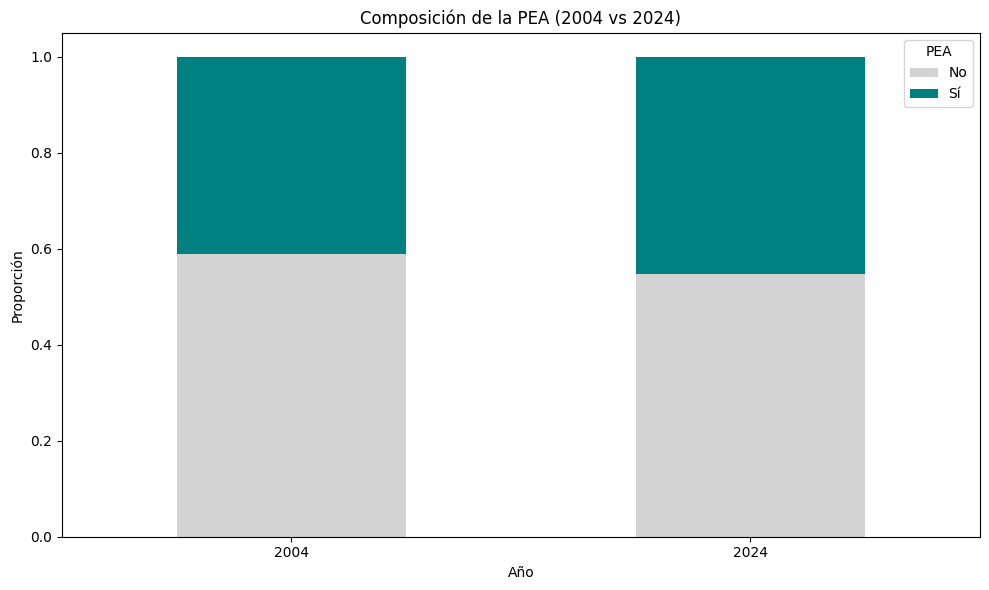

In [234]:
# Crear variable PEA: 1 si ocupado (1) o desocupado (2), 0 si no
respondieron["PEA"] = respondieron["ESTADO"].apply(lambda x: 1 if x in [1, 2] else 0)

# Agrupar por año y PEA
pea_2004 = respondieron[respondieron["ANO4"] == 2004]["PEA"].value_counts(normalize=True)
pea_2024 = respondieron[respondieron["ANO4"] == 2024]["PEA"].value_counts(normalize=True)

# Unir para graficar
pea_comparacion = pd.DataFrame({"2004": pea_2004, "2024": pea_2024}).T

# Gráfico
pea_comparacion.plot(kind='bar', stacked=True, figsize=(10, 6), color=["lightgray", "teal"])
plt.title("Composición de la PEA (2004 vs 2024)")
plt.ylabel("Proporción")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.legend(title="PEA", labels=["No", "Sí"])
plt.tight_layout()
plt.show()


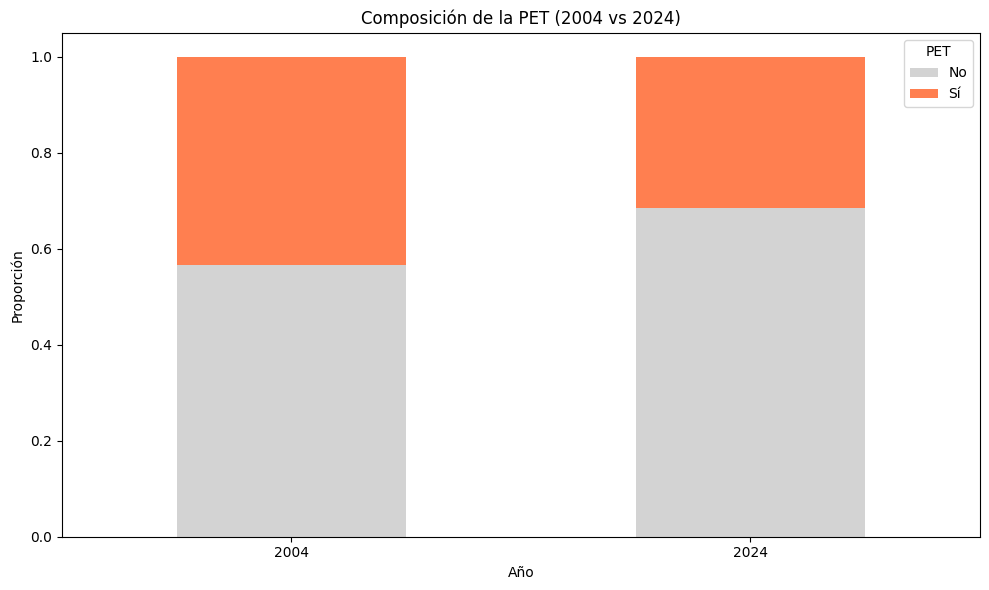

In [235]:
# Crear variable PET: 1 si entre 15 y 65 años
respondieron["PET"] = respondieron["CH06"].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Agrupar por año y PET
pet_2004 = respondieron[respondieron["ANO4"] == 2004]["PET"].value_counts(normalize=True)
pet_2024 = respondieron[respondieron["ANO4"] == 2024]["PET"].value_counts(normalize=True)

# Unir para graficar
pet_comparacion = pd.DataFrame({"2004": pet_2004, "2024": pet_2024}).T

# Gráfico
pet_comparacion.plot(kind='bar', stacked=True, figsize=(10, 6), color=["lightgray", "coral"])
plt.title("Composición de la PET (2004 vs 2024)")
plt.ylabel("Proporción")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.legend(title="PET", labels=["No", "Sí"])
plt.tight_layout()
plt.show()


In [237]:
# Crear variable "desocupado": 1 si ESTADO == 2
respondieron["desocupado"] = respondieron["ESTADO"].apply(lambda x: 1 if x == 2 else 0)

# Cantidad por año
desocupados_2004_total = respondieron[(respondieron["ANO4"] == 2004) & (respondieron["desocupado"] == 1)].shape[0]
desocupados_2024_total = respondieron[(respondieron["ANO4"] == 2024) & (respondieron["desocupado"] == 1)].shape[0]

print(f"Personas desocupadas en 2004: {desocupados_2004_total}")
print(f"Personas desocupadas en 2024: {desocupados_2024_total}")

Personas desocupadas en 2004: 3597
Personas desocupadas en 2024: 186


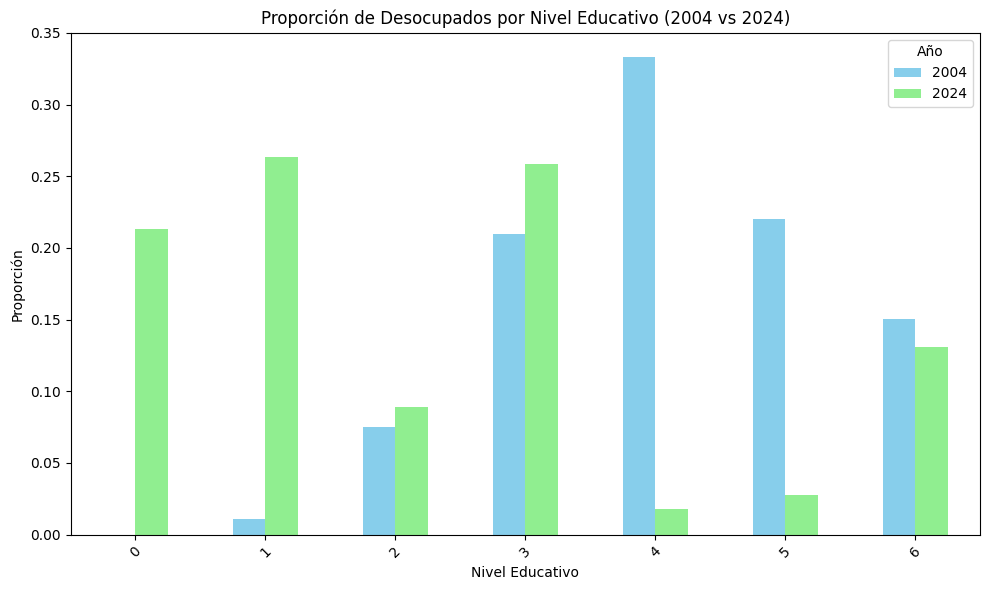

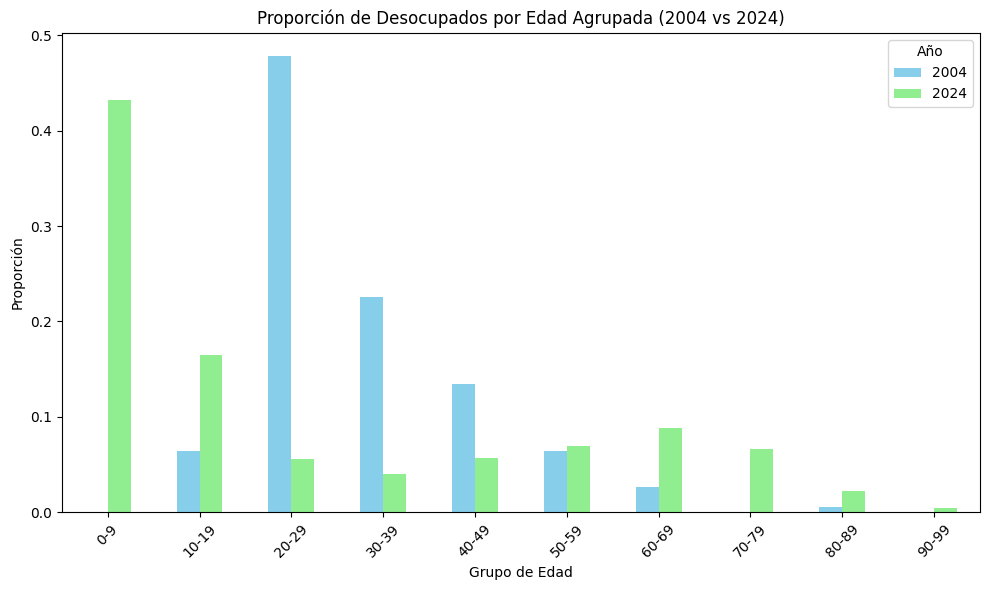

In [260]:
import matplotlib.pyplot as plt

# 5a. Proporción de desocupados por nivel educativo comparando 2004 vs 2024

# Filtrar por desocupados (ESTADO == 2)
desocupados_2004 = df_excel_noa[df_excel_noa['ESTADO'] == 2]
desocupados_2024 = df_stata_noa[df_stata_noa['ESTADO'] == 2]

# Contar la proporción de desocupados por nivel educativo
proporcion_desocupados_2004 = desocupados_2004['NIVEL_ED'].value_counts(normalize=True).sort_index()
proporcion_desocupados_2024 = desocupados_2024['NIVEL_ED'].value_counts(normalize=True).sort_index()

# Crear un dataframe para comparar las proporciones
comparacion_desocupados = pd.DataFrame({
    '2004': proporcion_desocupados_2004,
    '2024': proporcion_desocupados_2024
}).fillna(0)

# Graficar
comparacion_desocupados.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Proporción de Desocupados por Nivel Educativo (2004 vs 2024)')
plt.ylabel('Proporción')
plt.xlabel('Nivel Educativo')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

# 5b. Proporción de desocupados por edad agrupada comparando 2004 vs 2024

# Filtrar por desocupados (ESTADO == 2)
desocupados_2004 = df_excel_noa[df_excel_noa['ESTADO'] == 2]
desocupados_2024 = df_stata_noa[df_stata_noa['ESTADO'] == 2]

# Contar la proporción de desocupados por edad agrupada
proporcion_desocupados_edad_2004 = desocupados_2004['Edad_Grupo'].value_counts(normalize=True).sort_index()
proporcion_desocupados_edad_2024 = desocupados_2024['Edad_Grupo'].value_counts(normalize=True).sort_index()

# Crear un dataframe para comparar las proporciones
comparacion_desocupados_edad = pd.DataFrame({
    '2004': proporcion_desocupados_edad_2004,
    '2024': proporcion_desocupados_edad_2024
}).fillna(0)

# Graficar
comparacion_desocupados_edad.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Proporción de Desocupados por Edad Agrupada (2004 vs 2024)')
plt.ylabel('Proporción')
plt.xlabel('Grupo de Edad')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()



In [265]:
# Agregar la columna 'Edad_Grupo' a los dataframes respondieron_2004 y respondieron_2024
respondieron_2004['Edad_Grupo'] = df_excel_noa['Edad_Grupo']
respondieron_2024['Edad_Grupo'] = df_stata_noa['Edad_Grupo']

# Verificar las columnas nuevamente
print("Columnas en respondieron_2004:", respondieron_2004.columns)
print("Columnas en respondieron_2024:", respondieron_2024.columns)

Columnas en respondieron_2004: Index(['CH04', 'CH06', 'CH07', 'CH08', 'CH10', 'CH11', 'CH12', 'CH13',
       'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02H', 'PP02I', 'IPCF',
       'ANO4', 'SEXO_LABEL', 'Edad_Grupo'],
      dtype='object')
Columnas en respondieron_2024: Index(['CH04', 'CH06', 'CH07', 'CH08', 'CH10', 'CH11', 'CH12', 'CH13',
       'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02H', 'PP02I', 'IPCF',
       'ANO4', 'SEXO_LABEL', 'Edad_Grupo'],
      dtype='object')


<ipython-input-267-9859c435227f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desocupados_2004 = respondieron_2004.groupby('Edad_Grupo')['desocupado'].mean()
<ipython-input-267-9859c435227f>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desocupados_2024 = respondieron_2024.groupby('Edad_Grupo')['desocupado'].mean()


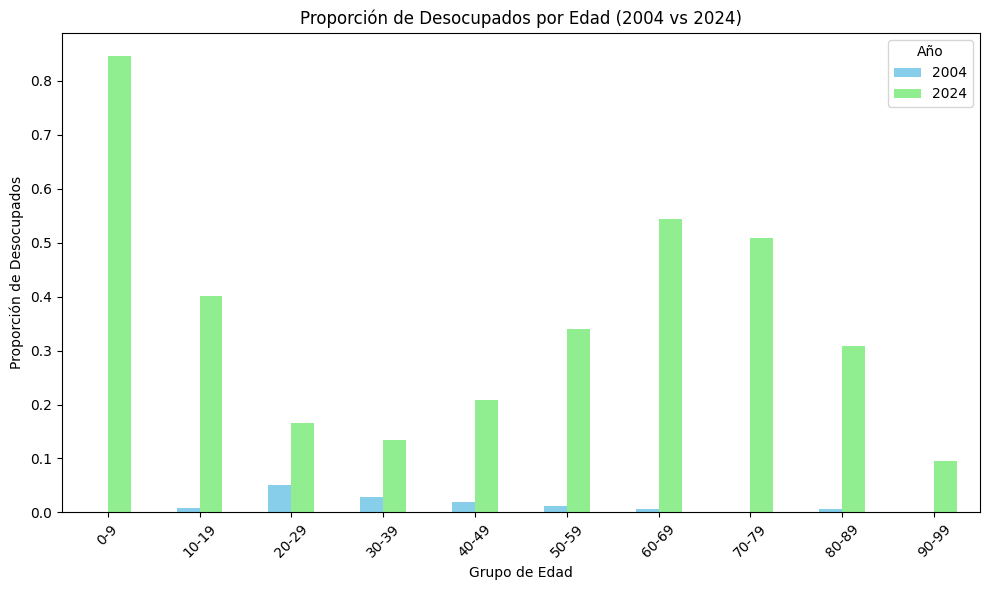

In [267]:
# Crear la columna 'desocupado' que tome 1 si la persona está desocupada (ESTADO = 2)
respondieron_2004['desocupado'] = (respondieron_2004['ESTADO'] == 2).astype(int)
respondieron_2024['desocupado'] = (respondieron_2024['ESTADO'] == 2).astype(int)

# Agrupar por 'Edad_Grupo' y calcular la proporción de desocupados por grupo de edad para 2004
desocupados_2004 = respondieron_2004.groupby('Edad_Grupo')['desocupado'].mean()

# Agrupar por 'Edad_Grupo' y calcular la proporción de desocupados por grupo de edad para 2024
desocupados_2024 = respondieron_2024.groupby('Edad_Grupo')['desocupado'].mean()

# Crear un dataframe con las proporciones para ambos años
desocupados_comparacion = pd.DataFrame({
    '2004': desocupados_2004,
    '2024': desocupados_2024
})

# Crear el gráfico de barras comparativo
desocupados_comparacion.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])

# Ajustar detalles del gráfico
plt.title('Proporción de Desocupados por Edad (2004 vs 2024)')
plt.xlabel('Grupo de Edad')
plt.ylabel('Proporción de Desocupados')
plt.xticks(rotation=45)
plt.legend(title='Año')

# Mostrar gráfico
plt.tight_layout()
plt.show()

